# Step 0: Imports and reading data

In [273]:
# Need to install and import pandas, numpy, seaborn, and scipy
# Use ggplot and set the dataframe to show all columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.options.display.max_columns = 200


In [199]:
# read the csv
df = pd.read_csv('coaster_db.csv')

# Step 1: Data Understanding

In [200]:
# Do general analysis of the data
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [201]:
# Look at all the columns
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

# Step 2: Data Preparation

In [202]:
# Save the dataframe with only these columns: Name, location, status, manufacturer,
# year introduced, latitude, longitude, type, cleaned open date, speed, height, inversions, gforce
# remember to make a "COPY" of it not reference it
df = df[['coaster_name',
    # 'Length', 'Speed', 
    'Location', 'Status',
     # 'Opening date', 'Type', 
       'Manufacturer', 
      # 'Height restriction', 'Model', 'Height', 'Inversions', 
      #'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name', 
       'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 
       #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
        # 'height_value', 'height_unit', 
        'height_ft', 'Inversions_clean', 'Gforce_clean']].copy()

In [203]:
# Convert opening date to daytime type
df.opening_date_clean = pd.to_datetime(df.opening_date_clean)

In [204]:
# Change columns title case
# Rename other columns titles, make sure it is inplaced

df.columns = df.columns.str.title()
df.rename(columns={'Opening_Date_Clean':'Grandopening',
                   'Speed_Mph':'Speed_mph',
                   'Height_Ft':'Height_ft',
                   'Inversions_Clean':'Inversions',
                   'Gforce_Clean':'Gforce',
                   }, inplace=True)

In [205]:
# Check null amount
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Grandopening,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [206]:
# Check and LOCate any duplicate values
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Grandopening,Speed_mph,Height_ft,Inversions,Gforce


In [207]:
# Check and LOCate any coaster with same name
df.loc[df.Coaster_Name.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Grandopening,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [208]:
# df.loc[df.Coaster_Name == 'Crystal Beach Cyclone']
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Grandopening,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [222]:
# Remove duplicated at name, location, and opening date, using tilda
# Make sure to reset the index (drop=True)
# Make sure to make a full copy not reference
df = df.loc[~df[['Coaster_Name', 'Location', 'Grandopening']].duplicated()].reset_index(drop=True).copy()


# Step 3: Feature Understanding

Text(0, 0.5, 'Count')

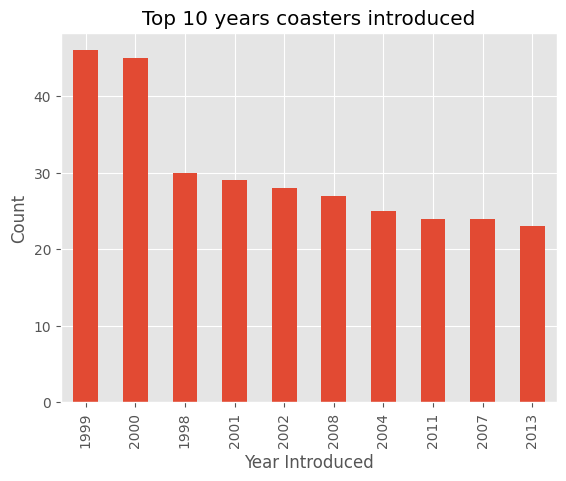

In [372]:
# Make a chart top 10 years coasters introduced
ax = df.Year_Introduced.value_counts().head(10).plot.bar()
ax.set_title('Top 10 years coasters introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

In [455]:
sns.barplot(df.Year_Introduced.value_counts().head(10))


TypeError: 'module' object is not callable

Text(0.5, 0, 'Speed (mph)')

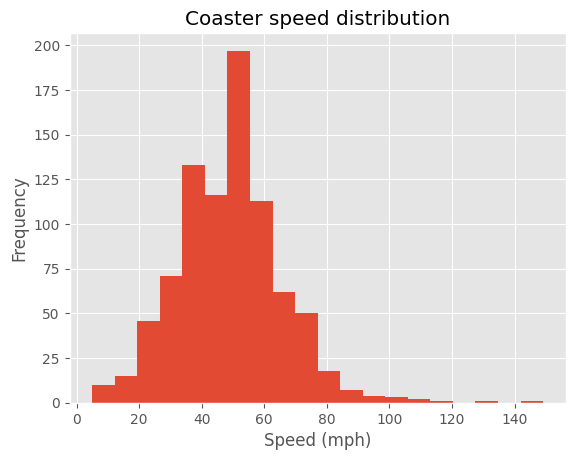

In [391]:
# Make a histogram to see coaster speed distribution, (bins=20)
ax = df.Speed_mph.plot.hist(bins=20, title='Coaster speed distribution')
ax.set_xlabel('Speed (mph)')


<Axes: xlabel='Speed_mph', ylabel='Count'>

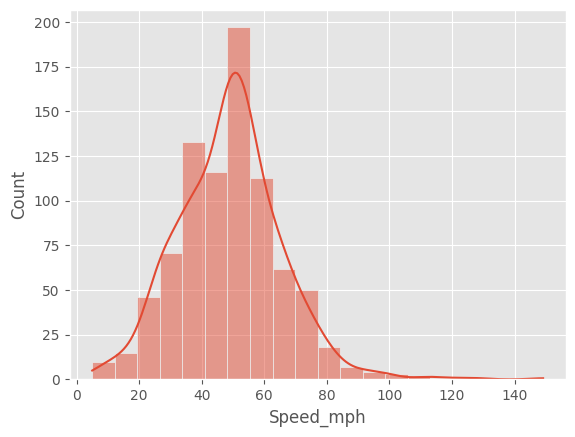

In [481]:
# sns.histplot(df.Speed_mph, bins=20, kde=True)
sns.histplot(df.Speed_mph, bins=20, kde=True)

# Step 4: Feature Relationships

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

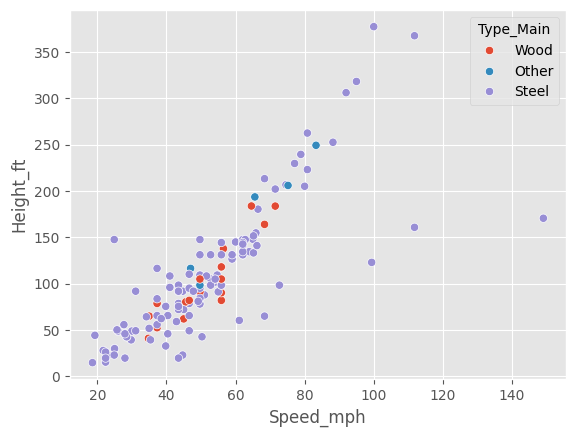

In [508]:
# Make a scatter plot of speed vs. height
# Remove the description top line
sns.scatterplot(df, x='Speed_mph', y='Height_ft', hue='Type_Main')
# plt.show()


Text(0, 0.5, 'Height (ft)')

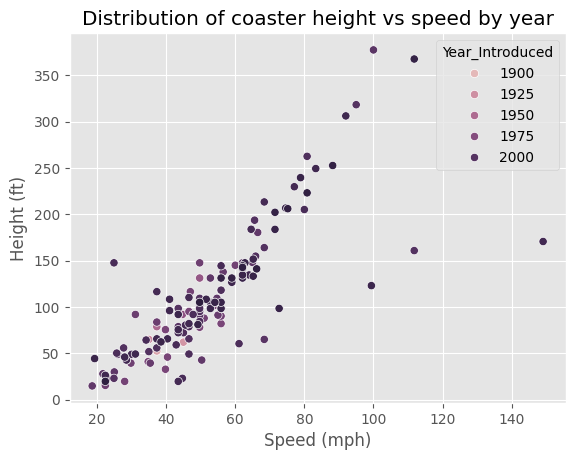

In [507]:
# Using seaborn, make the same scatter plot with year introduced involved
# ax = sns.scatterplot(x=df.Speed_mph, y=df.Height_ft, hue=df.Year_Introduced)
ax = sns.scatterplot(df, x='Speed_mph', y='Height_ft', hue='Year_Introduced')
ax.set_title('Distribution of coaster height vs speed by year')
ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Height (ft)')


In [491]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Grandopening', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

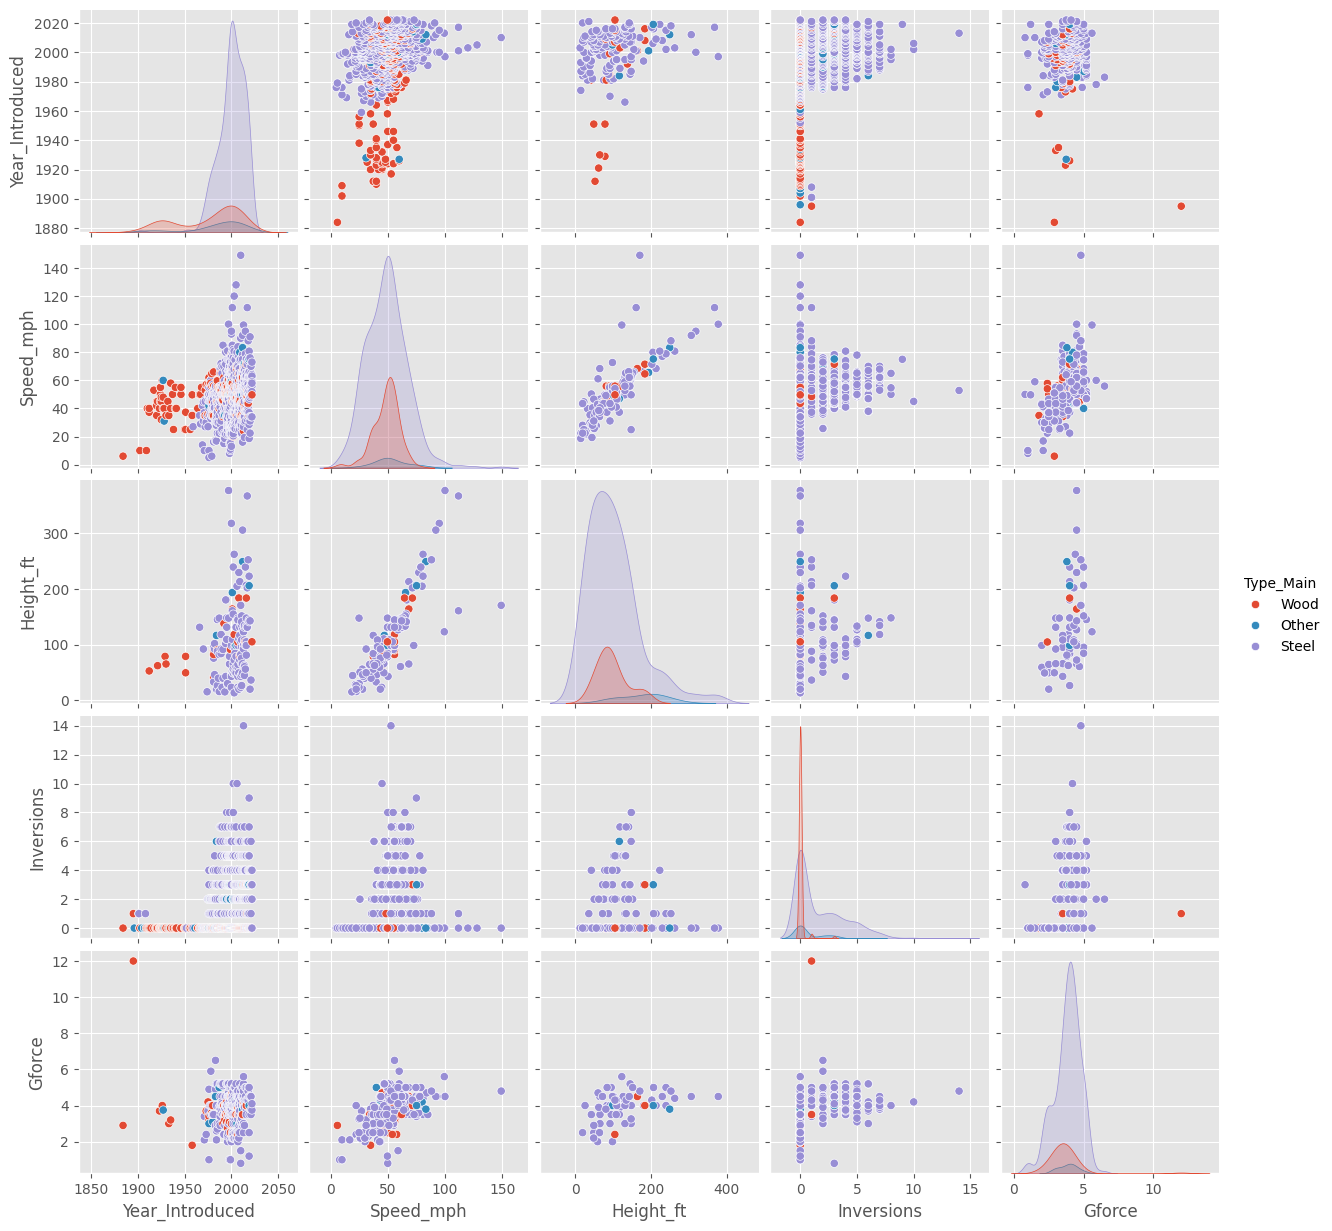

In [503]:
# Make a pair plot, with variety of variable such as inversion and gforce
# Make sure to make it correlation with type
# Remove description bar on top
sns.pairplot(df, 
             vars=['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce'],
             hue='Type_Main')


<Axes: >

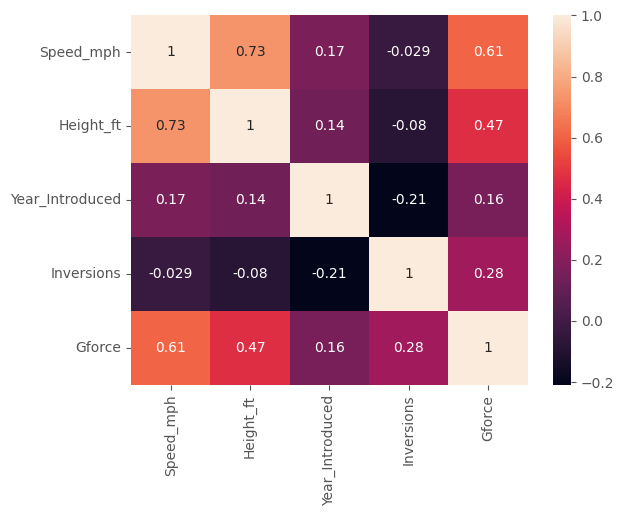

In [518]:
# Make heatmap that show CORRelation between those variables.
# Be sure to drop null

ax = df[['Speed_mph','Height_ft','Year_Introduced','Inversions','Gforce']].dropna().corr()
sns.heatmap(ax, annot=True)

# Step 5: Ask a Question about the data

In [614]:
# What are the locations with the fastest roller coasters(minimum of 10)?
# Using query, groupby, agg, sort values, and plot it with figsize

[Location
 Other                             True
 Kings Island                      True
 Cedar Point                       True
 Six Flags Magic Mountain          True
 Hersheypark                       True
                                  ...  
 Granada Studios Tour             False
 Funtown Splashtown USA           False
 Tolchester Beach Park            False
 Suzuka, Mie Prefecture, Japan    False
 Epcot                            False
 Name: count, Length: 280, dtype: bool]